# 📊 Análise Exploratória de Dados (EDA) - Passos Mágicos

## Objetivo
Realizar uma análise exploratória completa dos dados do Instituto Passos Mágicos para:
- Entender a estrutura e qualidade dos dados
- Identificar padrões e relações entre variáveis
- Detectar outliers e anomalias
- Gerar insights para a modelagem preditiva de defasagem escolar

## Datasets
Dados provenientes de **3 abas** do arquivo Excel original:
- **PEDE2022** — 860 alunos, 42 variáveis
- **PEDE2023** — 1.014 alunos, 48 variáveis
- **PEDE2024** — 1.156 alunos, 50 variáveis

**Contexto**: Instituto Passos Mágicos trabalha com educação de crianças e jovens de baixa renda, utilizando indicadores de desempenho para acompanhar a evolução dos alunos.

---

In [3]:
# Importar bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import sys

# Configurações
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Adicionar src ao path para importar módulos
sys.path.append('../src')

print("✅ Bibliotecas importadas com sucesso!")
print(f"📦 Pandas: {pd.__version__}")
print(f"📦 NumPy: {np.__version__}")
print(f"📦 Matplotlib: {plt.matplotlib.__version__}")
print(f"📦 Seaborn: {sns.__version__}")

✅ Bibliotecas importadas com sucesso!
📦 Pandas: 2.2.3
📦 NumPy: 2.2.5
📦 Matplotlib: 3.10.6
📦 Seaborn: 0.13.2


In [4]:
# Carregar os 3 datasets (exportados das abas do Excel)
data_dir = Path('../data')

datasets = {
    '2022': pd.read_csv(data_dir / 'PEDE2022.csv'),
    '2023': pd.read_csv(data_dir / 'PEDE2023.csv'),
    '2024': pd.read_csv(data_dir / 'PEDE2024.csv'),
}

# Resumo de cada dataset
for ano, df in datasets.items():
    print(f"📊 PEDE{ano}: {df.shape[0]:,} linhas × {df.shape[1]} colunas")

# Dataset consolidado (para análises cruzadas)
# Adiciona coluna 'Ano' antes de concatenar
for ano, df in datasets.items():
    df['Ano_PEDE'] = int(ano)

df_all = pd.concat(datasets.values(), ignore_index=True)
print(f"\n📊 Consolidado: {df_all.shape[0]:,} linhas × {df_all.shape[1]} colunas")

# Atalhos para acesso individual
df_2022 = datasets['2022']
df_2023 = datasets['2023']
df_2024 = datasets['2024']

print("\n✅ Variáveis disponíveis: df_2022, df_2023, df_2024, df_all")

📊 PEDE2022: 860 linhas × 42 colunas
📊 PEDE2023: 1,014 linhas × 48 colunas
📊 PEDE2024: 1,156 linhas × 50 colunas

📊 Consolidado: 3,030 linhas × 64 colunas

✅ Variáveis disponíveis: df_2022, df_2023, df_2024, df_all


## 3. Visão Geral dos Dados

Análise da estrutura, tipos e estatísticas descritivas de cada dataset.

In [5]:
# Visão geral de cada dataset
for ano, df in datasets.items():
    print(f"\n{'='*70}")
    print(f"📊 PEDE{ano}")
    print(f"{'='*70}")
    print(f"Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")
    print(f"\nTipos de dados:")
    print(df.dtypes.value_counts().to_string())
    print(f"\nPrimeiras linhas:")
    display(df.head(3))


📊 PEDE2022
Dimensões: 860 linhas × 43 colunas

Tipos de dados:
object     23
int64      10
float64    10

Primeiras linhas:


,RA,Fase,Turma,Nome,Ano nasc,Idade 22,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,...,Indicado,Atingiu PV,IPV,IAN,Fase ideal,Defas,Destaque IEG,Destaque IDA,Destaque IPV,Ano_PEDE
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,...,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,...,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022
2,RA-3,7,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,Ametista,...,Não,Não,7.556,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,2022



📊 PEDE2023
Dimensões: 1014 linhas × 49 colunas

Tipos de dados:
float64    29
object     17
int64       3

Primeiras linhas:


,RA,Fase,INDE 2023,Pedra 2023,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,...,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1,Ano_PEDE
0,RA-861,ALFA,9.31095,Topázio,ALFA A - G0/G1,Aluno-861,6/17/2015,8,Feminino,2023,...,NaN,8.920,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN,2023
1,RA-862,ALFA,8.22120,Topázio,ALFA A - G0/G1,Aluno-862,5/31/2014,9,Masculino,2023,...,NaN,8.585,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN,2023
2,RA-863,ALFA,5.92975,Quartzo,ALFA A - G0/G1,Aluno-863,2/25/2016,7,Masculino,2023,...,NaN,6.260,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN,2023



📊 PEDE2024
Dimensões: 1156 linhas × 51 colunas

Tipos de dados:
object     23
float64    23
int64       5

Primeiras linhas:


,RA,Fase,INDE 2024,Pedra 2024,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,...,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Escola,Ativo/ Inativo,Ativo/ Inativo.1,Ano_PEDE
0,RA-1275,ALFA,7.611366666700001,Ametista,ALFA A - G0/G1,Aluno-1275,2016-07-28 00:00:00,8,Masculino,2024,...,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando,2024
1,RA-1276,ALFA,8.002866666700001,Topázio,ALFA A - G0/G1,Aluno-1276,2016-10-16 00:00:00,8,Feminino,2024,...,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando,2024
2,RA-1277,ALFA,7.952200000100001,Ametista,ALFA A - G0/G1,Aluno-1277,2016-08-16 00:00:00,8,Masculino,2024,...,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Dom Pedro Villas Boas de Souza,Cursando,Cursando,2024


In [6]:
# Estatísticas descritivas — PEDE2022 (base principal)
print("📊 Estatísticas Descritivas — PEDE2022")
display(df_2022.describe().round(2))

print("\n📊 Estatísticas Descritivas — PEDE2023")
display(df_2023.describe().round(2))

print("\n📊 Estatísticas Descritivas — PEDE2024")
display(df_2024.describe().round(2))

📊 Estatísticas Descritivas — PEDE2022


,Fase,Ano nasc,Idade 22,Ano ingresso,INDE 22,Cg,Cf,Ct,Nº Av,IAA,IEG,IPS,IDA,Matem,Portug,Inglês,IPV,IAN,Defas,Ano_PEDE
count,860.00,860.00,860.00,860.00,860.00,860.00,860.00,860.00,860.00,860.00,860.00,860.00,860.00,858.00,858.00,283.00,860.00,860.00,860.00,860.0
mean,2.10,2009.86,12.14,2020.50,7.04,430.52,75.52,6.60,3.05,8.27,7.89,6.90,6.09,5.81,6.32,5.88,7.25,6.42,-0.94,2022.0
std,1.79,2.77,2.77,1.79,1.02,248.43,52.31,3.98,0.78,2.06,1.64,1.07,2.05,2.41,2.08,2.96,1.09,2.39,0.85,0.0
min,0.00,2001.00,7.00,2016.00,3.03,1.00,1.00,1.00,2.00,0.00,0.00,2.50,0.00,0.00,0.00,0.00,2.50,2.50,-5.00,2022.0
25%,1.00,2008.00,10.00,2019.00,6.49,215.75,30.00,3.00,2.00,7.90,7.00,6.30,4.80,4.30,5.20,3.50,6.72,5.00,-1.00,2022.0
50%,2.00,2010.00,12.00,2021.00,7.20,430.50,67.00,6.00,3.00,8.80,8.30,7.50,6.30,6.00,6.70,6.30,7.33,5.00,-1.00,2022.0
75%,3.00,2012.00,14.00,2022.00,7.75,645.25,118.00,9.00,4.00,9.50,9.10,7.50,7.60,7.80,7.80,8.50,7.92,10.00,0.00,2022.0
max,7.00,2015.00,21.00,2022.00,9.44,862.00,192.00,18.00,4.00,10.00,10.00,10.00,9.90,10.00,10.00,10.00,10.00,10.00,2.00,2022.0



📊 Estatísticas Descritivas — PEDE2023


,INDE 2023,Ano ingresso,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Rec Av1,...,Indicado,Atingiu PV,IPV,IAN,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1,Ano_PEDE
count,931.00,1014.00,0.0,600.00,0.0,0.0,0.0,0.0,938.00,0.0,...,0.0,0.0,938.00,1014.00,1014.00,0.0,0.0,0.0,0.0,1014.0
mean,7.34,2021.38,NaN,7.26,NaN,NaN,NaN,NaN,3.11,NaN,...,NaN,NaN,8.03,7.24,-0.65,NaN,NaN,NaN,NaN,2023.0
std,0.90,1.87,NaN,0.90,NaN,NaN,NaN,NaN,0.77,NaN,...,NaN,NaN,0.95,2.54,0.82,NaN,NaN,NaN,NaN,0.0
min,3.75,2016.00,NaN,3.70,NaN,NaN,NaN,NaN,2.00,NaN,...,NaN,NaN,3.32,2.50,-4.00,NaN,NaN,NaN,NaN,2023.0
25%,6.72,2021.00,NaN,6.74,NaN,NaN,NaN,NaN,3.00,NaN,...,NaN,NaN,7.46,5.00,-1.00,NaN,NaN,NaN,NaN,2023.0
50%,7.41,2022.00,NaN,7.40,NaN,NaN,NaN,NaN,3.00,NaN,...,NaN,NaN,8.04,5.00,-1.00,NaN,NaN,NaN,NaN,2023.0
75%,8.00,2023.00,NaN,7.90,NaN,NaN,NaN,NaN,4.00,NaN,...,NaN,NaN,8.67,10.00,0.00,NaN,NaN,NaN,NaN,2023.0
max,9.37,2023.00,NaN,9.44,NaN,NaN,NaN,NaN,4.00,NaN,...,NaN,NaN,10.01,10.00,2.00,NaN,NaN,NaN,NaN,2023.0



📊 Estatísticas Descritivas — PEDE2024


,Idade,Ano ingresso,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Rec Av1,Rec Av2,...,Ing,Indicado,Atingiu PV,IPV,IAN,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Ano_PEDE
count,1156.00,1156.00,472.00,690.00,0.0,0.0,0.0,1156.00,0.0,0.0,...,474.00,0.0,0.0,1054.00,1156.00,1156.00,0.0,0.0,0.0,1156.0
mean,12.99,2022.52,7.37,7.46,NaN,NaN,NaN,2.95,NaN,NaN,...,6.60,NaN,NaN,7.35,7.68,-0.41,NaN,NaN,NaN,2024.0
std,3.58,1.20,0.86,0.85,NaN,NaN,NaN,1.40,NaN,NaN,...,2.88,NaN,NaN,1.05,2.50,0.85,NaN,NaN,NaN,0.0
min,7.00,2021.00,3.03,4.41,NaN,NaN,NaN,0.00,NaN,NaN,...,0.00,NaN,NaN,2.94,2.50,-3.00,NaN,NaN,NaN,2024.0
25%,10.00,2021.00,6.89,6.86,NaN,NaN,NaN,2.00,NaN,NaN,...,5.00,NaN,NaN,6.79,5.00,-1.00,NaN,NaN,NaN,2024.0
50%,12.00,2023.00,7.48,7.56,NaN,NaN,NaN,3.00,NaN,NaN,...,7.00,NaN,NaN,7.50,10.00,0.00,NaN,NaN,NaN,2024.0
75%,15.00,2024.00,7.98,8.05,NaN,NaN,NaN,4.00,NaN,NaN,...,9.00,NaN,NaN,8.09,10.00,0.00,NaN,NaN,NaN,2024.0
max,27.00,2024.00,9.44,9.37,NaN,NaN,NaN,6.00,NaN,NaN,...,10.00,NaN,NaN,9.76,10.00,3.00,NaN,NaN,NaN,2024.0


## 4. Análise da Variável Target — Defasagem

A **defasagem escolar** é a variável que queremos prever. Ela representa a diferença entre a fase atual do aluno e a fase ideal esperada.
- **Negativa** → aluno atrasado (risco)
- **Zero** → na fase esperada
- **Positiva** → adiantado

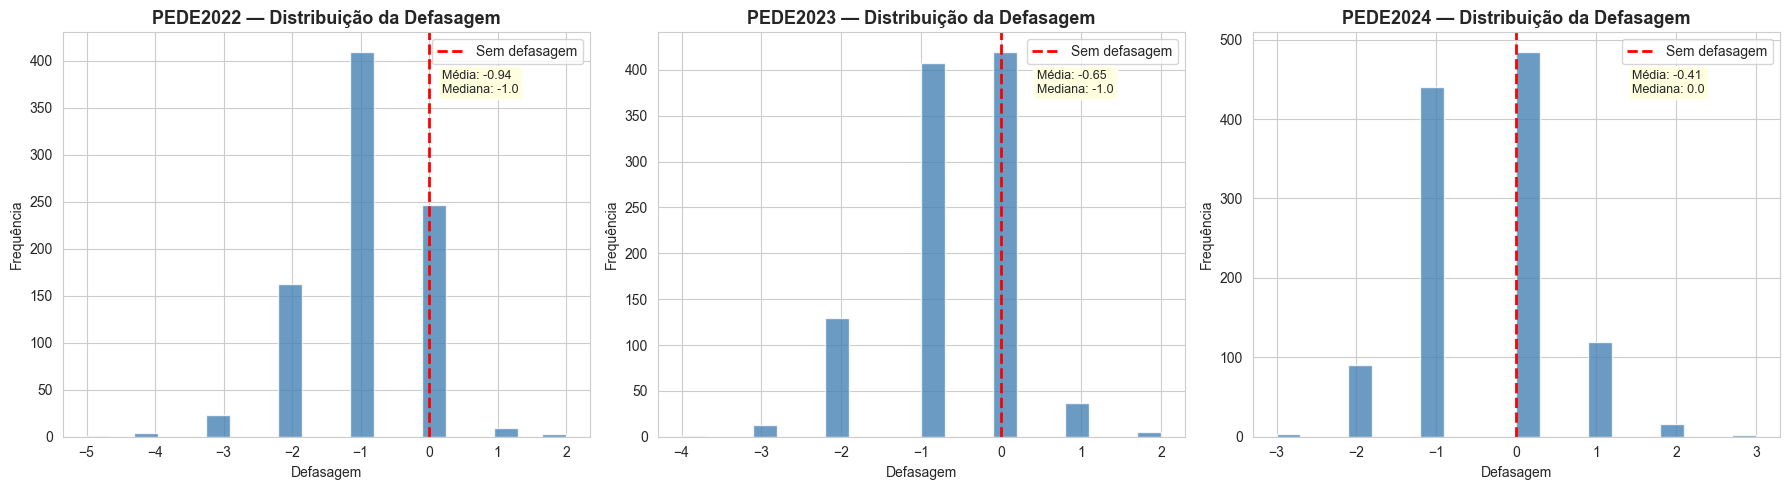

In [7]:
# Identificar coluna de defasagem em cada dataset
defas_cols = {
    '2022': 'Defas',
    '2023': 'Defasagem',
    '2024': 'Defasagem',
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (ano, df) in enumerate(datasets.items()):
    col = defas_cols[ano]
    if col in df.columns:
        # Converter para numérico (caso venha como string)
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')
        
        ax = axes[idx]
        df[col].dropna().hist(bins=20, ax=ax, color='steelblue', edgecolor='white', alpha=0.8)
        ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Sem defasagem')
        ax.set_title(f'PEDE{ano} — Distribuição da Defasagem', fontsize=13, fontweight='bold')
        ax.set_xlabel('Defasagem')
        ax.set_ylabel('Frequência')
        ax.legend()
        
        # Estatísticas
        media = df[col].mean()
        mediana = df[col].median()
        ax.annotate(f'Média: {media:.2f}\nMediana: {mediana:.1f}', 
                     xy=(0.72, 0.85), xycoords='axes fraction', fontsize=9,
                     bbox=dict(boxstyle='round', facecolor='lightyellow'))
    else:
        axes[idx].text(0.5, 0.5, f'Coluna "{col}" não encontrada', ha='center', va='center')
        axes[idx].set_title(f'PEDE{ano}')

plt.tight_layout()
plt.show()

In [8]:
# Classificação de risco por defasagem
for ano, df in datasets.items():
    col = defas_cols[ano]
    if col in df.columns:
        serie = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce').dropna()
        
        risco = pd.cut(serie, bins=[-np.inf, -2, -1, 0, np.inf],
                        labels=['Crítico (≤-2)', 'Alto (-1)', 'Adequado (0)', 'Adiantado (>0)'])
        
        contagem = risco.value_counts().sort_index()
        print(f"\n📊 PEDE{ano} — Distribuição de Risco:")
        for cat, val in contagem.items():
            pct = val / len(serie) * 100
            print(f"   {cat}: {val} alunos ({pct:.1f}%)")


📊 PEDE2022 — Distribuição de Risco:
   Crítico (≤-2): 191 alunos (22.2%)
   Alto (-1): 410 alunos (47.7%)
   Adequado (0): 247 alunos (28.7%)
   Adiantado (>0): 12 alunos (1.4%)

📊 PEDE2023 — Distribuição de Risco:
   Crítico (≤-2): 144 alunos (14.2%)
   Alto (-1): 408 alunos (40.2%)
   Adequado (0): 420 alunos (41.4%)
   Adiantado (>0): 42 alunos (4.1%)

📊 PEDE2024 — Distribuição de Risco:
   Crítico (≤-2): 93 alunos (8.0%)
   Alto (-1): 441 alunos (38.1%)
   Adequado (0): 485 alunos (42.0%)
   Adiantado (>0): 137 alunos (11.9%)


## 5. Distribuição dos Indicadores de Desempenho

Os principais indicadores do PEDE são:
- **INDE** — Índice de Desenvolvimento Educacional (composto)
- **IAA** — Indicador de Autoavaliação
- **IEG** — Indicador de Engajamento
- **IPS** — Indicador Psicossocial
- **IDA** — Indicador de Desempenho Acadêmico
- **IPV** — Indicador de Ponto de Virada
- **IAN** — Indicador de Adequação de Nível
- **IPP** — Indicador Psicopedagógico (a partir de 2023)

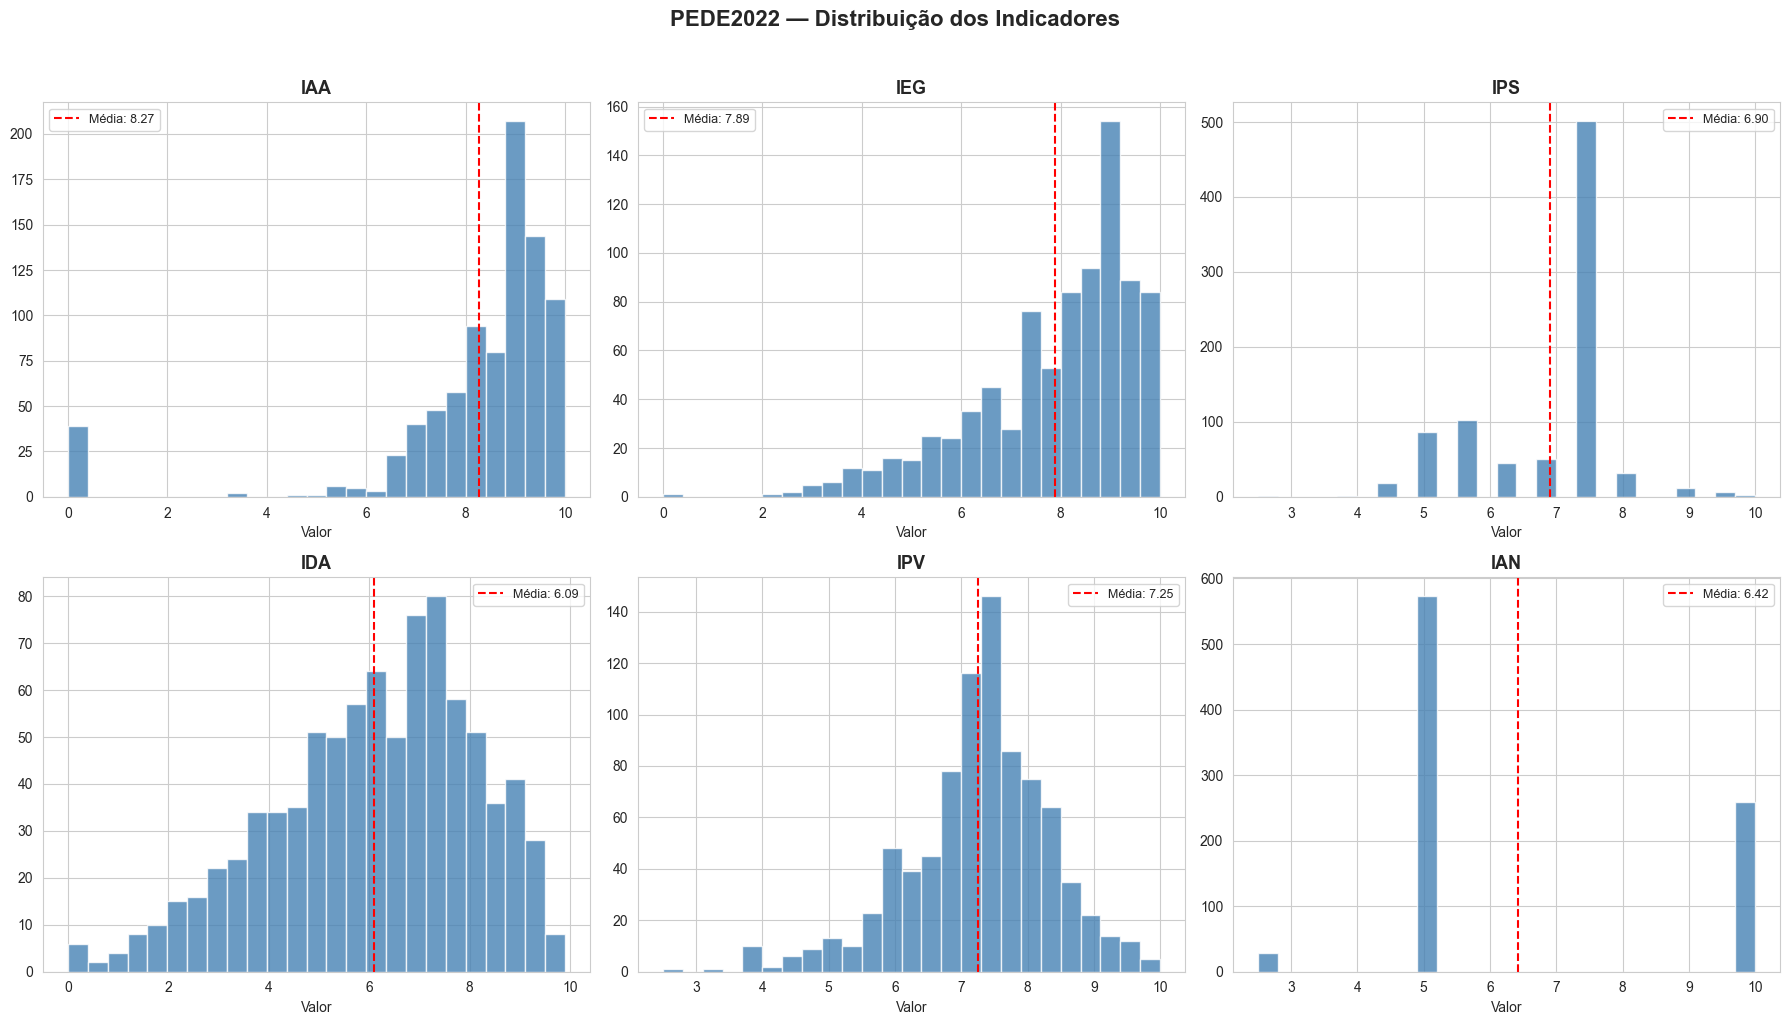

In [9]:
# Distribuição dos indicadores — PEDE2022
indicadores_2022 = ['IAA', 'IEG', 'IPS', 'IDA', 'IPV', 'IAN']

# Converter vírgulas para pontos se necessário
for col in indicadores_2022:
    if col in df_2022.columns:
        df_2022[col] = pd.to_numeric(df_2022[col].astype(str).str.replace(',', '.'), errors='coerce')

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(indicadores_2022):
    if col in df_2022.columns:
        ax = axes[i]
        df_2022[col].dropna().hist(bins=25, ax=ax, color='steelblue', edgecolor='white', alpha=0.8)
        ax.axvline(df_2022[col].mean(), color='red', linestyle='--', label=f'Média: {df_2022[col].mean():.2f}')
        ax.set_title(f'{col}', fontsize=13, fontweight='bold')
        ax.set_xlabel('Valor')
        ax.legend(fontsize=9)

fig.suptitle('PEDE2022 — Distribuição dos Indicadores', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

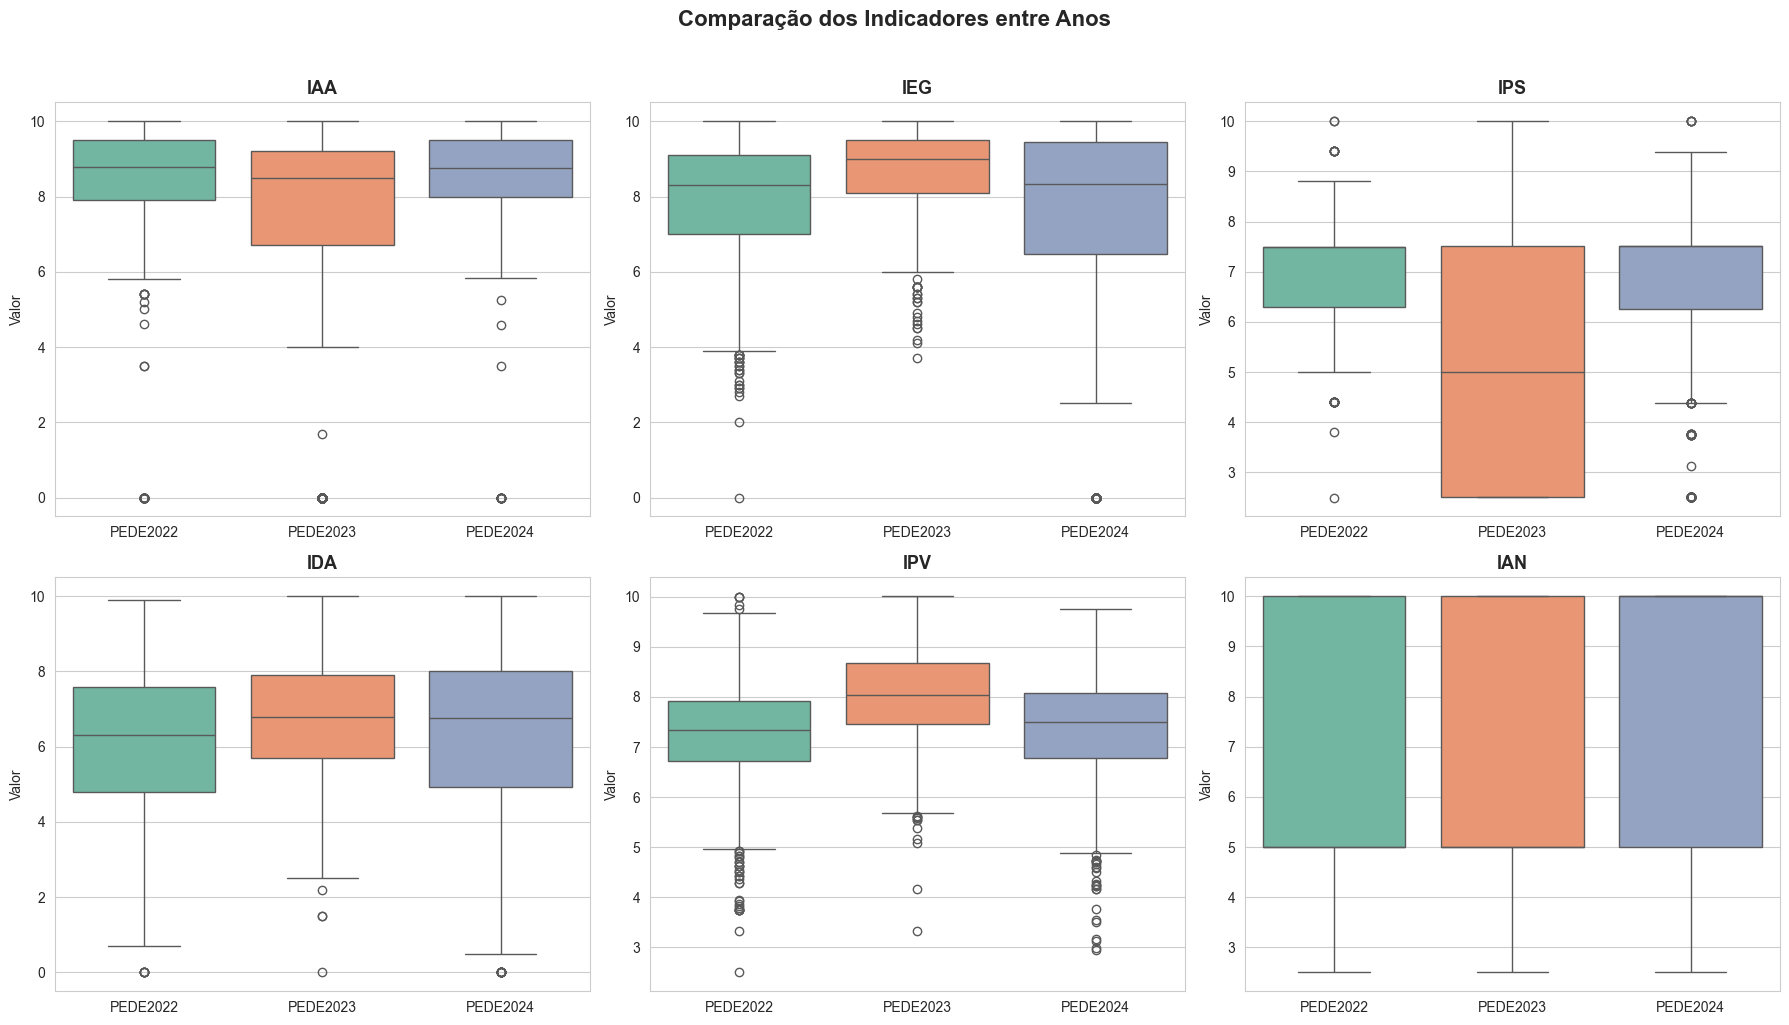

In [10]:
# Boxplots comparativos dos indicadores entre os 3 anos
indicadores_comuns = ['IAA', 'IEG', 'IPS', 'IDA', 'IPV', 'IAN']

# Preparar dados para comparação
dados_comp = []
for ano, df in datasets.items():
    for col in indicadores_comuns:
        if col in df.columns:
            serie = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce').dropna()
            for val in serie:
                dados_comp.append({'Ano': f'PEDE{ano}', 'Indicador': col, 'Valor': val})

df_comp = pd.DataFrame(dados_comp)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, ind in enumerate(indicadores_comuns):
    ax = axes[i]
    subset = df_comp[df_comp['Indicador'] == ind]
    sns.boxplot(data=subset, x='Ano', y='Valor', ax=ax, palette='Set2')
    ax.set_title(f'{ind}', fontsize=13, fontweight='bold')
    ax.set_xlabel('')

fig.suptitle('Comparação dos Indicadores entre Anos', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 6. Análise de Variáveis Categóricas

Distribuição das variáveis categóricas: Gênero, Instituição de ensino, Pedra (classificação do aluno) e Fase.

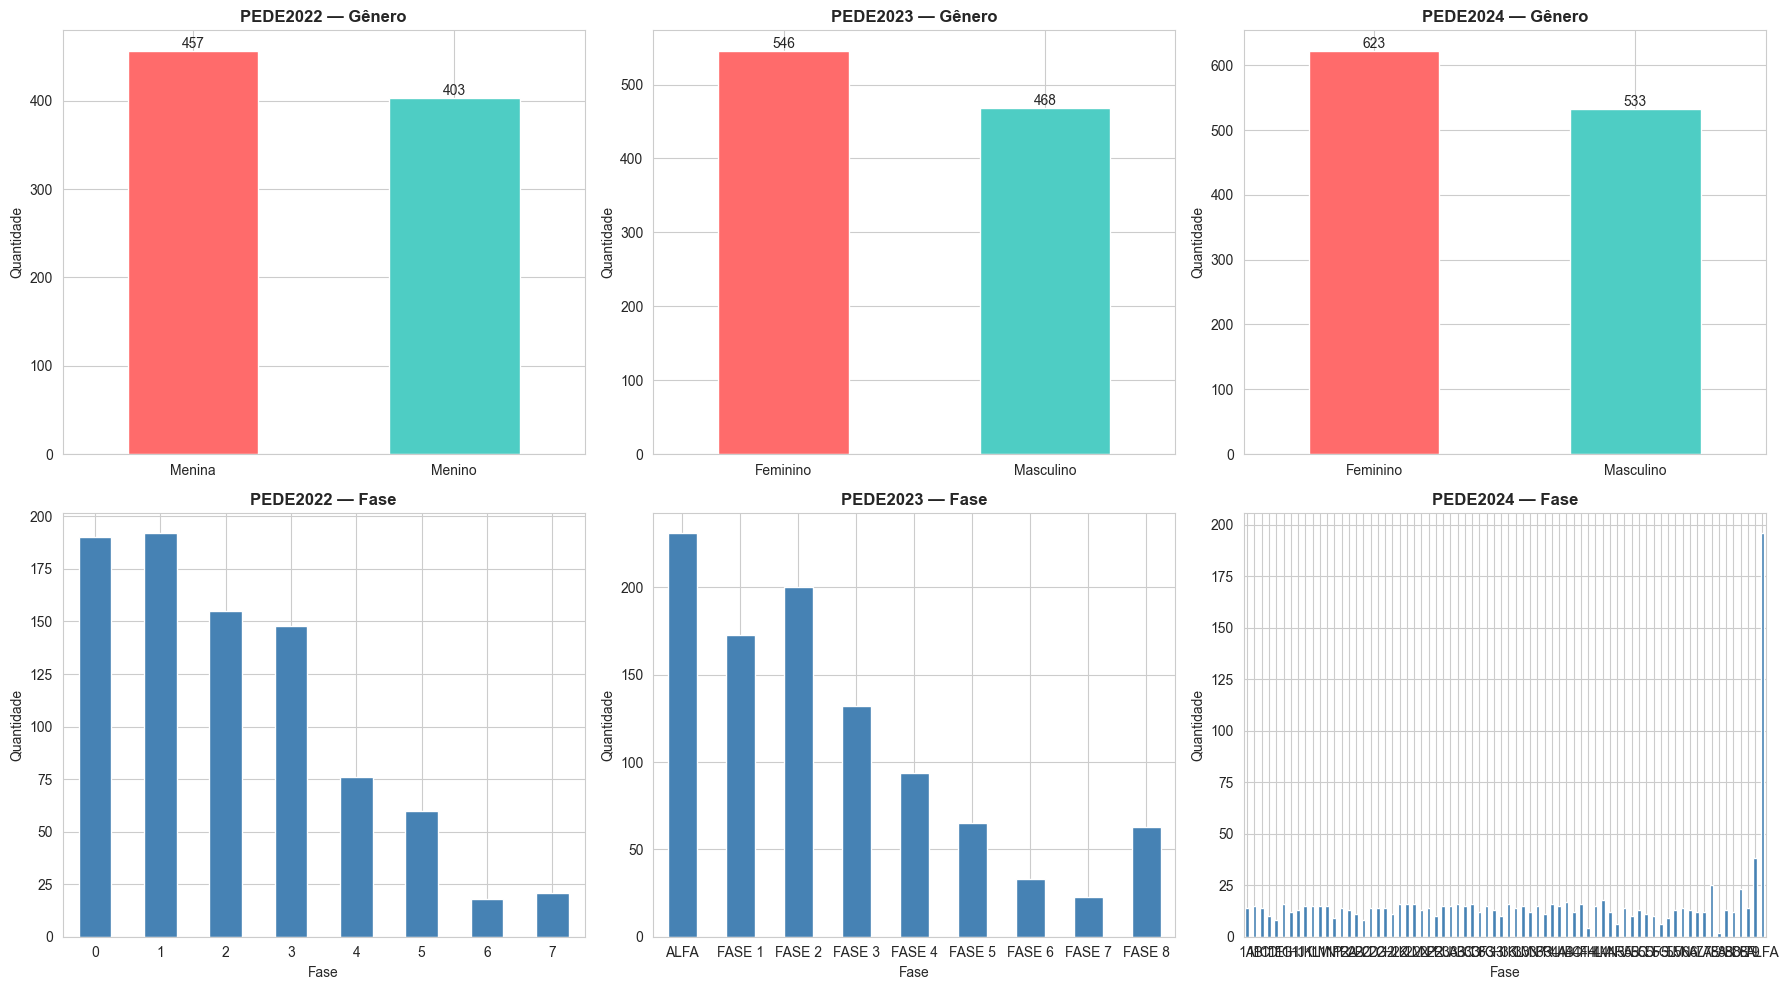

In [11]:
# Distribuição de Gênero e Fase por ano
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, (ano, df) in enumerate(datasets.items()):
    # Gênero
    ax = axes[0][idx]
    if 'Gênero' in df.columns:
        genero_counts = df['Gênero'].value_counts()
        genero_counts.plot(kind='bar', ax=ax, color=['#FF6B6B', '#4ECDC4'], edgecolor='white')
        ax.set_title(f'PEDE{ano} — Gênero', fontsize=12, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('Quantidade')
        ax.tick_params(axis='x', rotation=0)
        # Adicionar contagem no topo das barras
        for bar in ax.patches:
            ax.annotate(f'{int(bar.get_height())}', 
                       (bar.get_x() + bar.get_width()/2, bar.get_height()),
                       ha='center', va='bottom', fontsize=10)
    
    # Fase
    ax = axes[1][idx]
    if 'Fase' in df.columns:
        fase_counts = df['Fase'].value_counts().sort_index()
        fase_counts.plot(kind='bar', ax=ax, color='steelblue', edgecolor='white')
        ax.set_title(f'PEDE{ano} — Fase', fontsize=12, fontweight='bold')
        ax.set_xlabel('Fase')
        ax.set_ylabel('Quantidade')
        ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

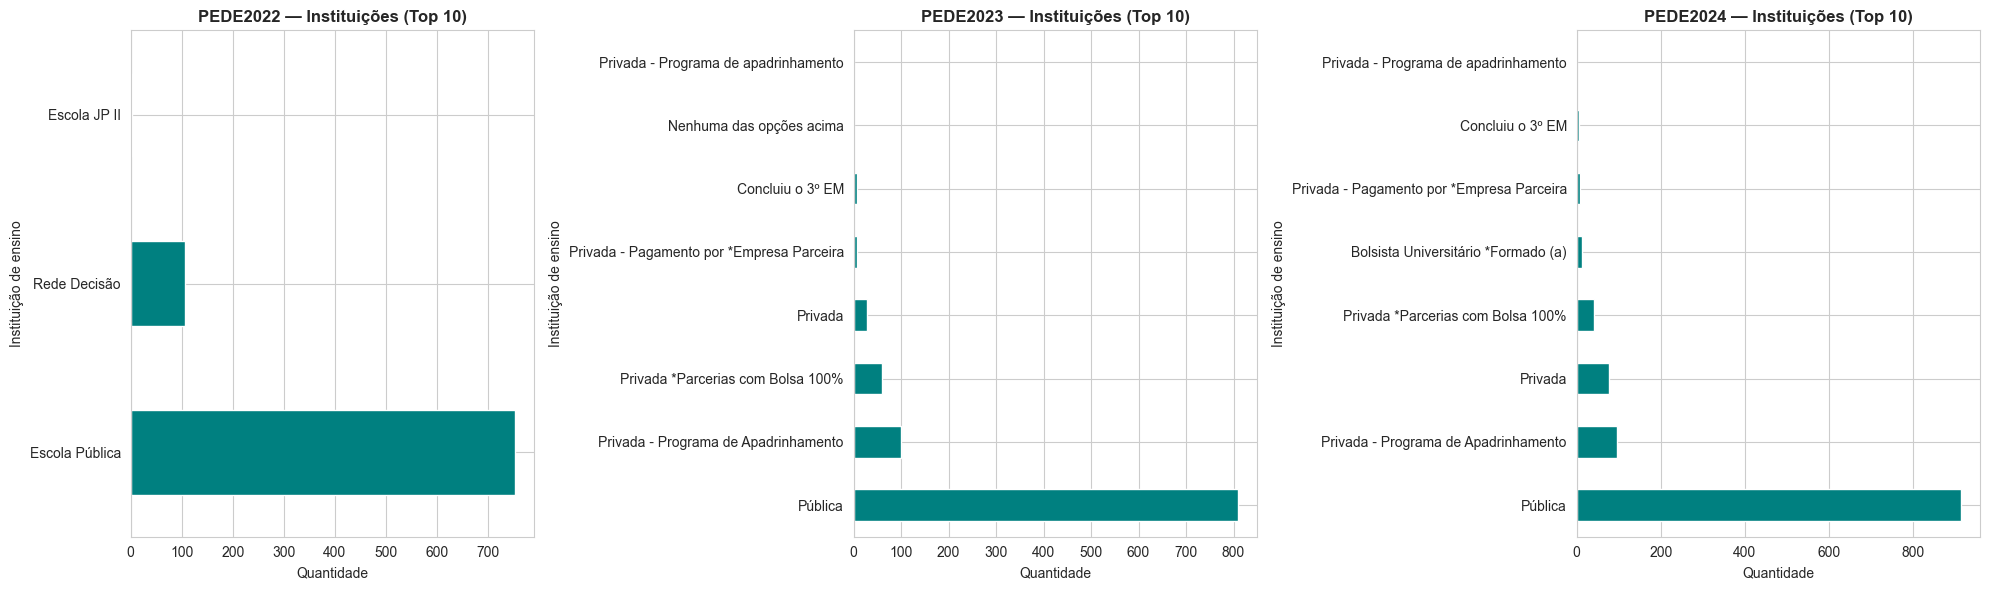

In [12]:
# Instituição de ensino — distribuição por ano
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, (ano, df) in enumerate(datasets.items()):
    ax = axes[idx]
    if 'Instituição de ensino' in df.columns:
        inst_counts = df['Instituição de ensino'].value_counts().head(10)
        inst_counts.plot(kind='barh', ax=ax, color='teal', edgecolor='white')
        ax.set_title(f'PEDE{ano} — Instituições (Top 10)', fontsize=12, fontweight='bold')
        ax.set_xlabel('Quantidade')

plt.tight_layout()
plt.show()

## 7. Matriz de Correlação

Análise das correlações entre variáveis numéricas para identificar relações lineares entre os indicadores.

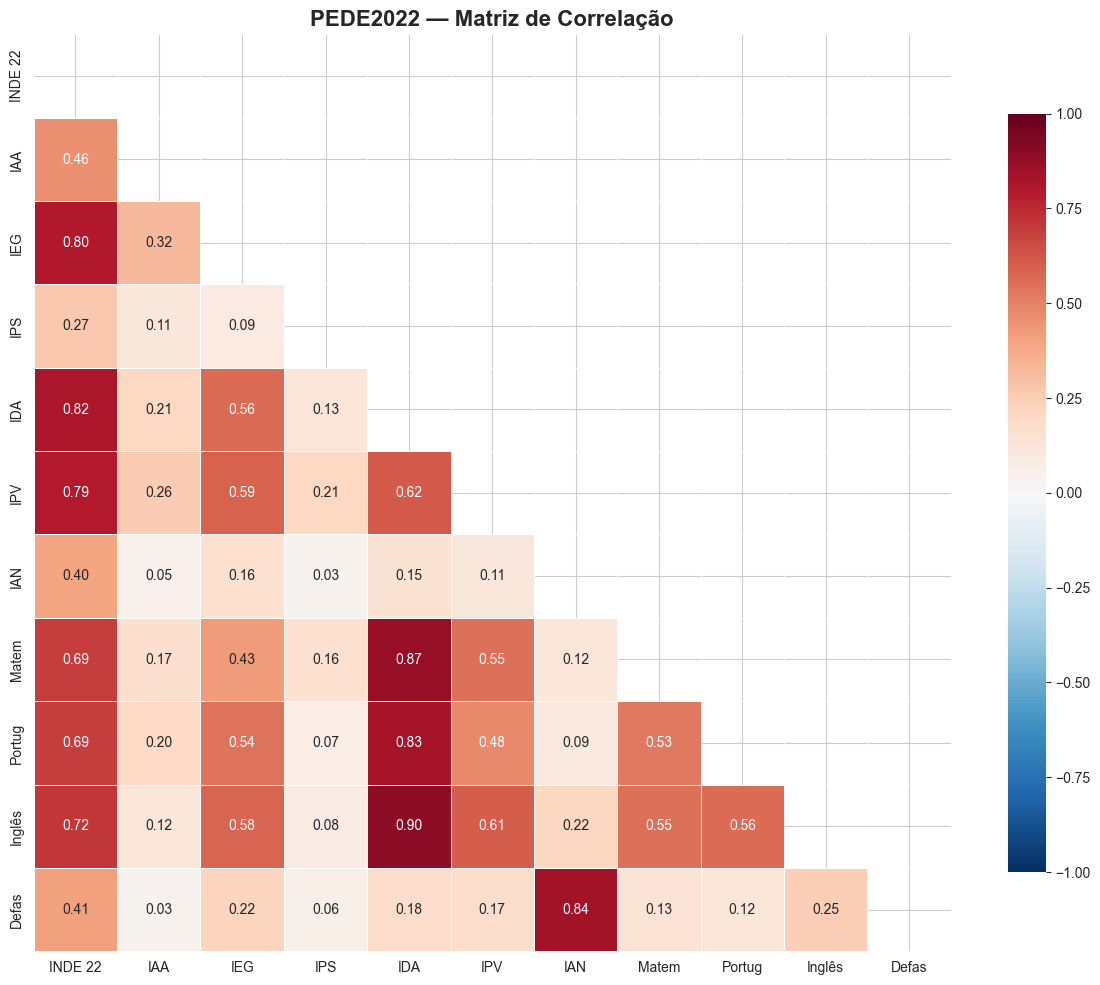


🔍 Top correlações com Defasagem (PEDE2022):
   + IAN: 0.838
   + INDE 22: 0.407
   + Inglês: 0.249
   + IEG: 0.220
   + IDA: 0.182
   + IPV: 0.173
   + Matem: 0.135
   + Portug: 0.123
   + IPS: 0.059
   + IAA: 0.033


In [13]:
# Matriz de correlação — PEDE2022
cols_numeric_2022 = ['INDE 22', 'IAA', 'IEG', 'IPS', 'IDA', 'IPV', 'IAN', 'Matem', 'Portug', 'Inglês', 'Defas']

# Converter colunas para numérico
df_corr = df_2022[cols_numeric_2022].copy()
for col in df_corr.columns:
    df_corr[col] = pd.to_numeric(df_corr[col].astype(str).str.replace(',', '.'), errors='coerce')

corr_matrix = df_corr.corr()

fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, vmin=-1, vmax=1, square=True, linewidths=0.5, ax=ax,
            cbar_kws={'shrink': 0.8})
ax.set_title('PEDE2022 — Matriz de Correlação', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlações com Defasagem
print("\n🔍 Top correlações com Defasagem (PEDE2022):")
corr_defas = corr_matrix['Defas'].drop('Defas').abs().sort_values(ascending=False)
for col, val in corr_defas.items():
    sinal = '+' if corr_matrix.loc[col, 'Defas'] > 0 else '-'
    print(f"   {sinal} {col}: {corr_matrix.loc[col, 'Defas']:.3f}")

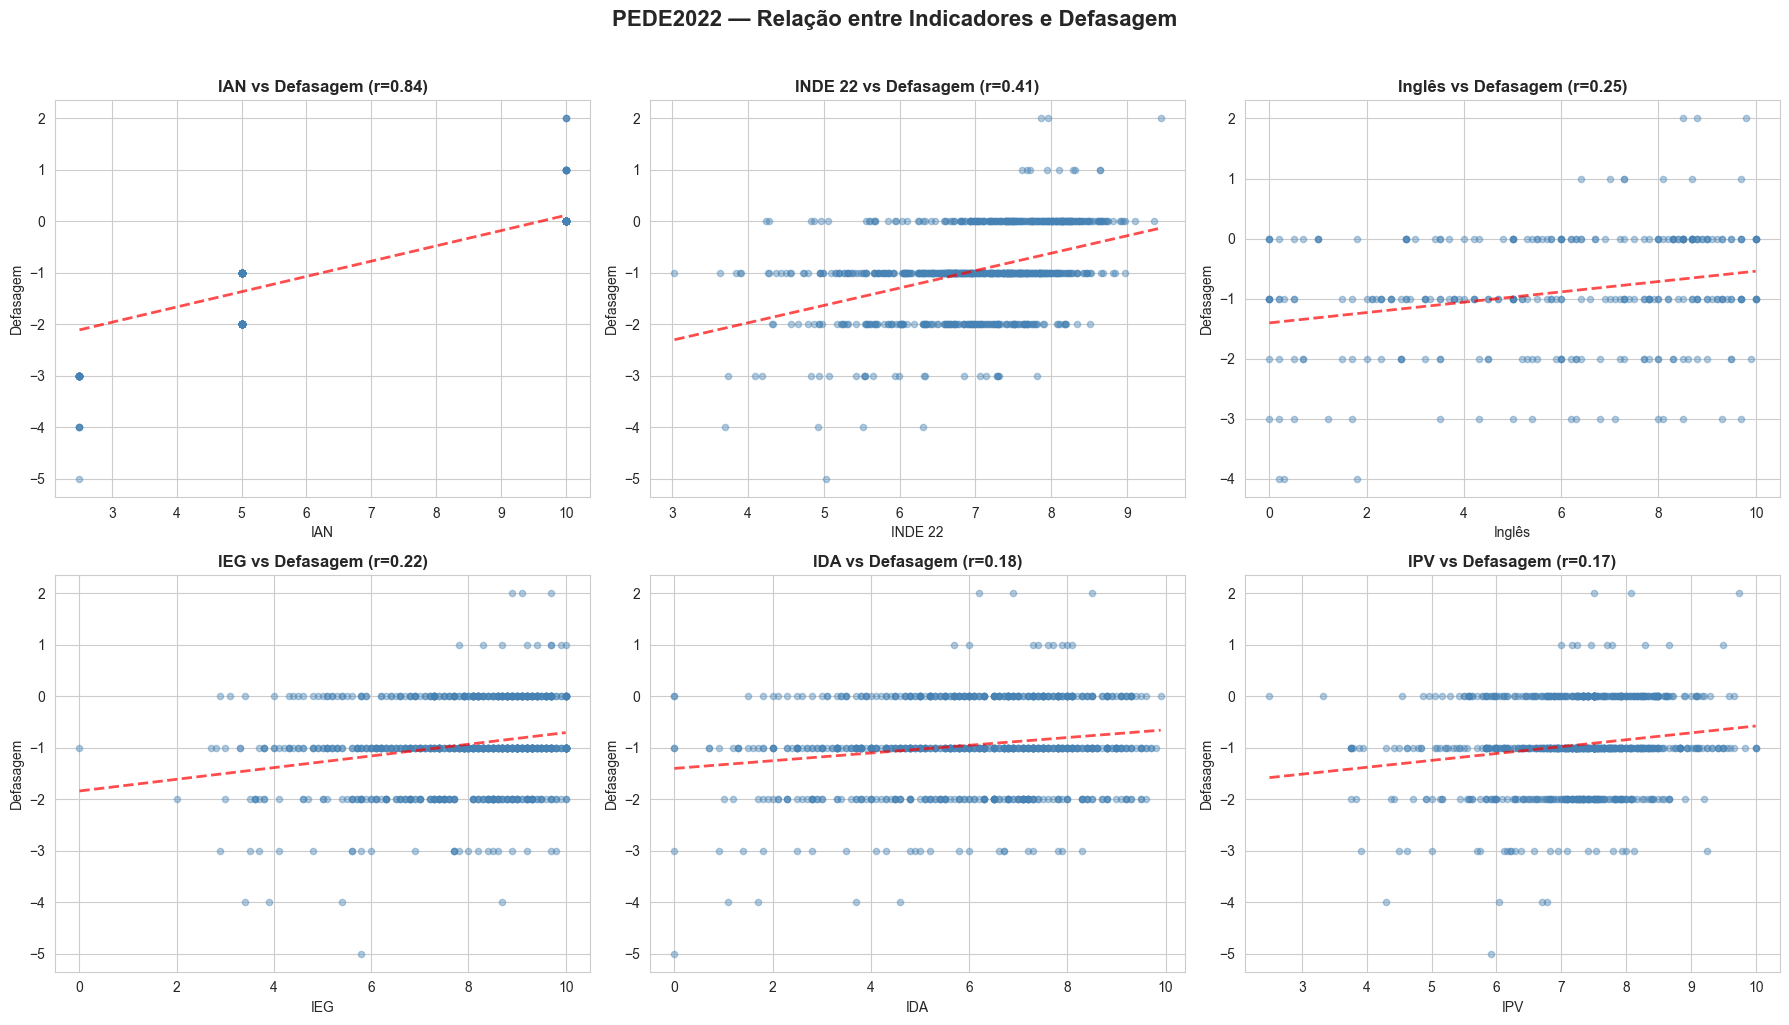

In [14]:
# Scatter plots: indicadores mais correlacionados com Defasagem
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

top_cols = corr_defas.head(6).index.tolist()

for i, col in enumerate(top_cols):
    ax = axes[i]
    ax.scatter(df_corr[col], df_corr['Defas'], alpha=0.4, s=20, color='steelblue')
    
    # Linha de tendência
    mask_valid = df_corr[[col, 'Defas']].dropna()
    if len(mask_valid) > 2:
        z = np.polyfit(mask_valid[col], mask_valid['Defas'], 1)
        p = np.poly1d(z)
        x_line = np.linspace(mask_valid[col].min(), mask_valid[col].max(), 100)
        ax.plot(x_line, p(x_line), 'r--', linewidth=2, alpha=0.7)
    
    corr_val = corr_matrix.loc[col, 'Defas']
    ax.set_title(f'{col} vs Defasagem (r={corr_val:.2f})', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Defasagem')

fig.suptitle('PEDE2022 — Relação entre Indicadores e Defasagem', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 8. Evolução Temporal — Métricas entre Anos

Análise comparativa das médias dos indicadores ao longo dos 3 anos do PEDE, identificando tendências de melhoria ou piora no desempenho dos alunos.

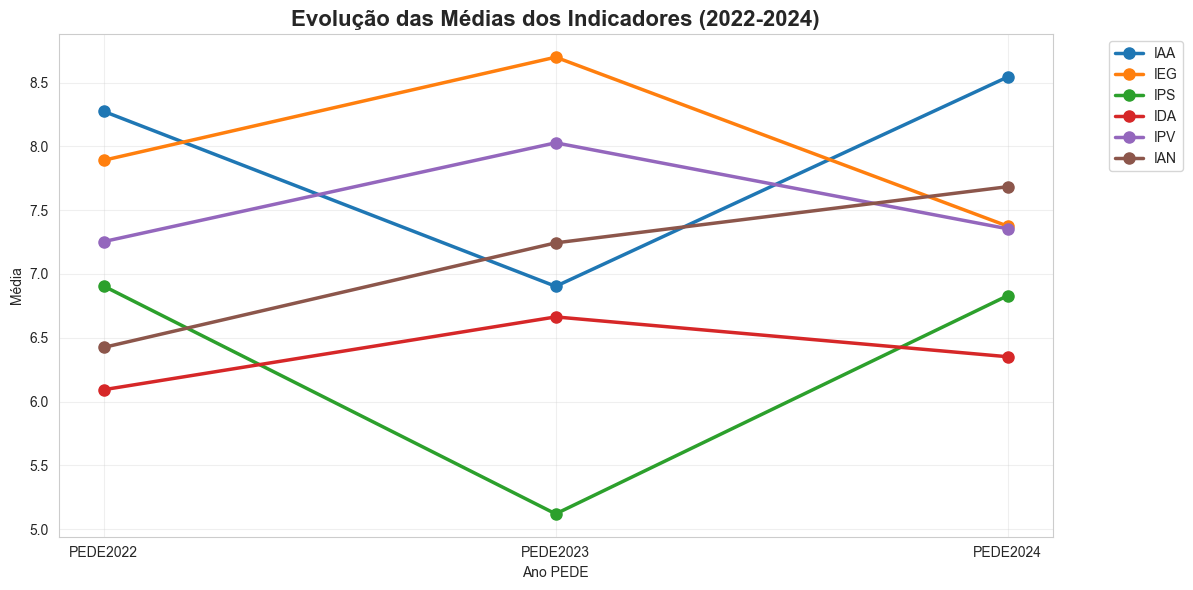


📊 Tabela Comparativa de Médias:


,IAA,IEG,IPS,IDA,IPV,IAN
Ano,,,,,,
2022,8.27,7.89,6.90,6.09,7.25,6.42
2023,6.90,8.70,5.12,6.66,8.03,7.24
2024,8.54,7.37,6.83,6.35,7.35,7.68


In [15]:
# Evolução das médias dos indicadores ao longo dos anos
indicadores_comuns = ['IAA', 'IEG', 'IPS', 'IDA', 'IPV', 'IAN']

evolucao = {}
for ano, df in datasets.items():
    medias = {}
    for col in indicadores_comuns:
        if col in df.columns:
            serie = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')
            medias[col] = serie.mean()
    evolucao[ano] = medias

df_evolucao = pd.DataFrame(evolucao).T
df_evolucao.index.name = 'Ano'

# Gráfico de linhas
fig, ax = plt.subplots(figsize=(12, 6))
df_evolucao.plot(ax=ax, marker='o', linewidth=2.5, markersize=8)
ax.set_title('Evolução das Médias dos Indicadores (2022-2024)', fontsize=16, fontweight='bold')
ax.set_xlabel('Ano PEDE')
ax.set_ylabel('Média')
ax.set_xticks(range(len(df_evolucao)))
ax.set_xticklabels([f'PEDE{a}' for a in df_evolucao.index])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Tabela comparativa
print("\n📊 Tabela Comparativa de Médias:")
display(df_evolucao.round(2))

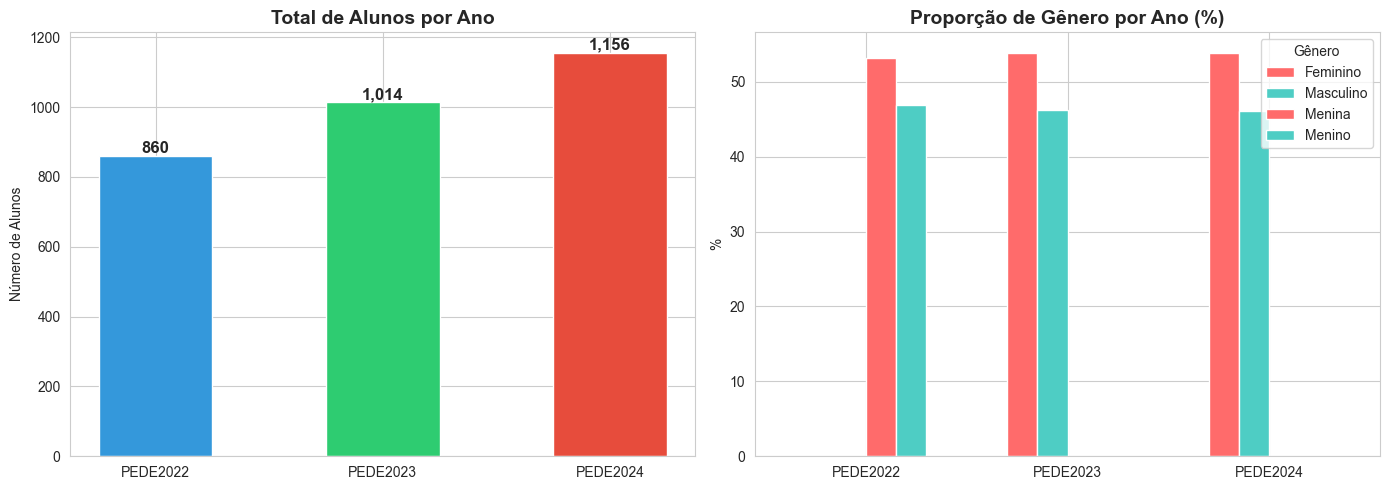

In [16]:
# Evolução do número de alunos e distribuição de gênero
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Total de alunos por ano
anos = []
totais = []
for ano, df in datasets.items():
    anos.append(f'PEDE{ano}')
    totais.append(len(df))

ax = axes[0]
bars = ax.bar(anos, totais, color=['#3498db', '#2ecc71', '#e74c3c'], edgecolor='white', width=0.5)
ax.set_title('Total de Alunos por Ano', fontsize=14, fontweight='bold')
ax.set_ylabel('Número de Alunos')
for bar, total in zip(bars, totais):
    ax.annotate(f'{total:,}', (bar.get_x() + bar.get_width()/2, bar.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Proporção de gênero por ano
ax = axes[1]
genero_data = {}
for ano, df in datasets.items():
    if 'Gênero' in df.columns:
        genero_data[f'PEDE{ano}'] = df['Gênero'].value_counts(normalize=True) * 100

df_genero = pd.DataFrame(genero_data).T
df_genero.plot(kind='bar', ax=ax, color=['#FF6B6B', '#4ECDC4'], edgecolor='white', width=0.6)
ax.set_title('Proporção de Gênero por Ano (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('%')
ax.set_xlabel('')
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Gênero')

plt.tight_layout()
plt.show()

## 9. Análise por Pedra — Classificação do Aluno

O sistema de **Pedras** classifica os alunos por nível de desempenho:
- **Quartzo** → desempenho mais baixo
- **Ágata** → desempenho intermediário-baixo
- **Ametista** → desempenho intermediário
- **Topázio** → desempenho alto

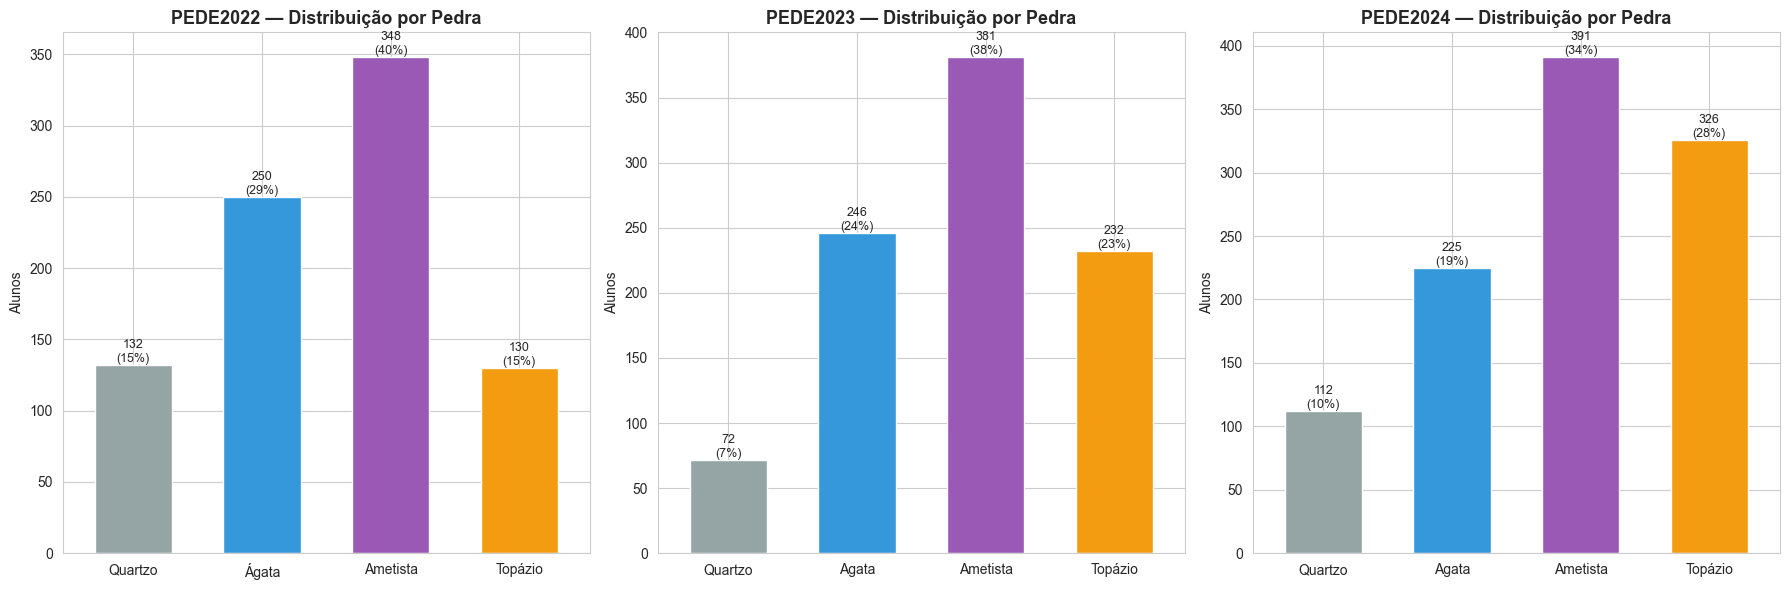

In [20]:
# Distribuição de Pedras ao longo dos anos
pedra_cols = {
    '2022': 'Pedra 22',
    '2023': 'Pedra 2023',   # coluna correta (não 'Pedra 23', que está vazia)
    '2024': 'Pedra 2024',
}

ordem_pedras = ['Quartzo', 'Ágata', 'Agata', 'Ametista', 'Topázio']
cores_pedras = {
    'Quartzo': '#95a5a6', 
    'Ágata': '#3498db', 'Agata': '#3498db',   # aceitar com e sem acento
    'Ametista': '#9b59b6', 
    'Topázio': '#f39c12',
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (ano, df) in enumerate(datasets.items()):
    col = pedra_cols.get(ano)
    ax = axes[idx]
    
    if col and col in df.columns:
        pedra_counts = df[col].dropna().value_counts()
        
        # Se não há dados na coluna, exibir mensagem e pular
        if len(pedra_counts) == 0:
            ax.text(0.5, 0.5, f'Sem dados de Pedra\n(coluna "{col}" vazia)',
                    ha='center', va='center', fontsize=12, color='gray',
                    transform=ax.transAxes)
            ax.set_title(f'PEDE{ano} — Distribuição por Pedra', fontsize=13, fontweight='bold')
            continue
        
        # Reordenar pelas pedras conhecidas (mantendo as que existem)
        pedra_ordered = pd.Series(dtype=int)
        for p in ordem_pedras:
            if p in pedra_counts.index:
                pedra_ordered[p] = pedra_counts[p]
        
        # Se nenhuma pedra padrão encontrada, usar os dados como estão
        if len(pedra_ordered) == 0:
            pedra_ordered = pedra_counts
        
        colors = [cores_pedras.get(p, 'gray') for p in pedra_ordered.index]
        pedra_ordered.plot(kind='bar', ax=ax, color=colors, edgecolor='white', width=0.6)
        ax.set_title(f'PEDE{ano} — Distribuição por Pedra', fontsize=13, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('Alunos')
        ax.tick_params(axis='x', rotation=0)
        
        # Percentuais
        for bar, (p, val) in zip(ax.patches, pedra_ordered.items()):
            pct = val / len(df) * 100
            ax.annotate(f'{val}\n({pct:.0f}%)', 
                       (bar.get_x() + bar.get_width()/2, bar.get_height()),
                       ha='center', va='bottom', fontsize=9)
    else:
        ax.text(0.5, 0.5, f'Coluna "{col}" não encontrada', ha='center', va='center')
        ax.set_title(f'PEDE{ano}')

plt.tight_layout()
plt.show()

In [ ]:
# Média dos indicadores por Pedra — PEDE2022
pedra_col = 'Pedra 22'
if pedra_col in df_2022.columns:
    indicadores = ['IAA', 'IEG', 'IPS', 'IDA', 'IPV', 'IAN']
    
    # Preparar dados
    df_pedra = df_2022[[pedra_col] + indicadores].copy()
    for col in indicadores:
        df_pedra[col] = pd.to_numeric(df_pedra[col].astype(str).str.replace(',', '.'), errors='coerce')
    
    # Calcular médias por pedra
    medias_pedra = df_pedra.groupby(pedra_col)[indicadores].mean()
    
    # Reordenar
    medias_pedra = medias_pedra.reindex([p for p in ordem_pedras if p in medias_pedra.index])
    
    fig, ax = plt.subplots(figsize=(12, 6))
    medias_pedra.plot(kind='bar', ax=ax, width=0.75, edgecolor='white')
    ax.set_title('PEDE2022 — Média dos Indicadores por Pedra', fontsize=16, fontweight='bold')
    ax.set_xlabel('Pedra')
    ax.set_ylabel('Média')
    ax.tick_params(axis='x', rotation=0)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Médias por Pedra (PEDE2022):")
    display(medias_pedra.round(2))

## 10. Análise de Desempenho Acadêmico

Notas nas disciplinas (Matemática, Português, Inglês) e sua relação com os indicadores de desempenho.

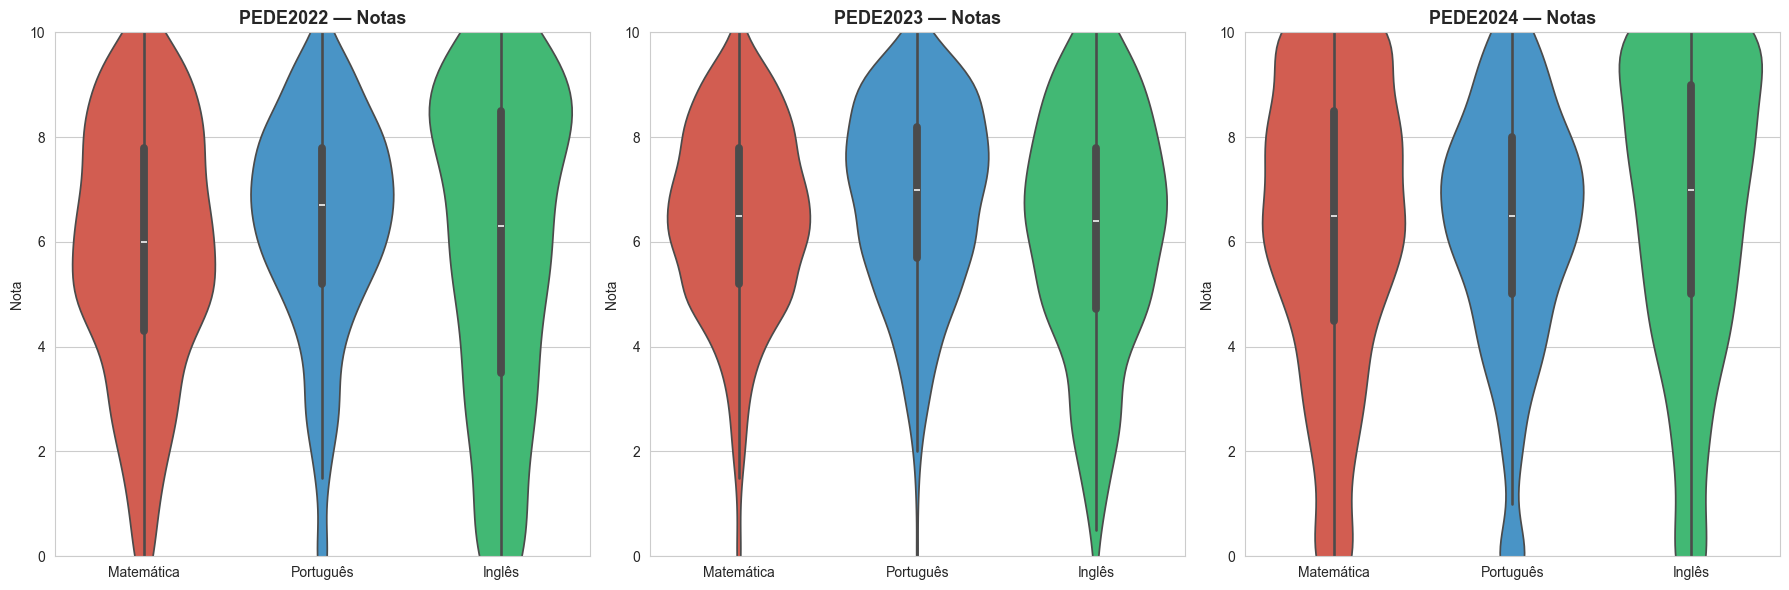

In [21]:
# Notas por disciplina — comparação entre anos
notas_cols = {
    '2022': {'Matem': 'Matemática', 'Portug': 'Português', 'Inglês': 'Inglês'},
    '2023': {'Mat': 'Matemática', 'Por': 'Português', 'Ing': 'Inglês'},
    '2024': {'Mat': 'Matemática', 'Por': 'Português', 'Ing': 'Inglês'},
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (ano, df) in enumerate(datasets.items()):
    ax = axes[idx]
    cols_map = notas_cols[ano]
    
    dados_notas = []
    for col_orig, disciplina in cols_map.items():
        if col_orig in df.columns:
            serie = pd.to_numeric(df[col_orig].astype(str).str.replace(',', '.'), errors='coerce').dropna()
            for val in serie:
                dados_notas.append({'Disciplina': disciplina, 'Nota': val})
    
    if dados_notas:
        df_notas = pd.DataFrame(dados_notas)
        sns.violinplot(data=df_notas, x='Disciplina', y='Nota', ax=ax, 
                      palette=['#e74c3c', '#3498db', '#2ecc71'], inner='box')
        ax.set_title(f'PEDE{ano} — Notas', fontsize=13, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylim(0, 10)

plt.tight_layout()
plt.show()

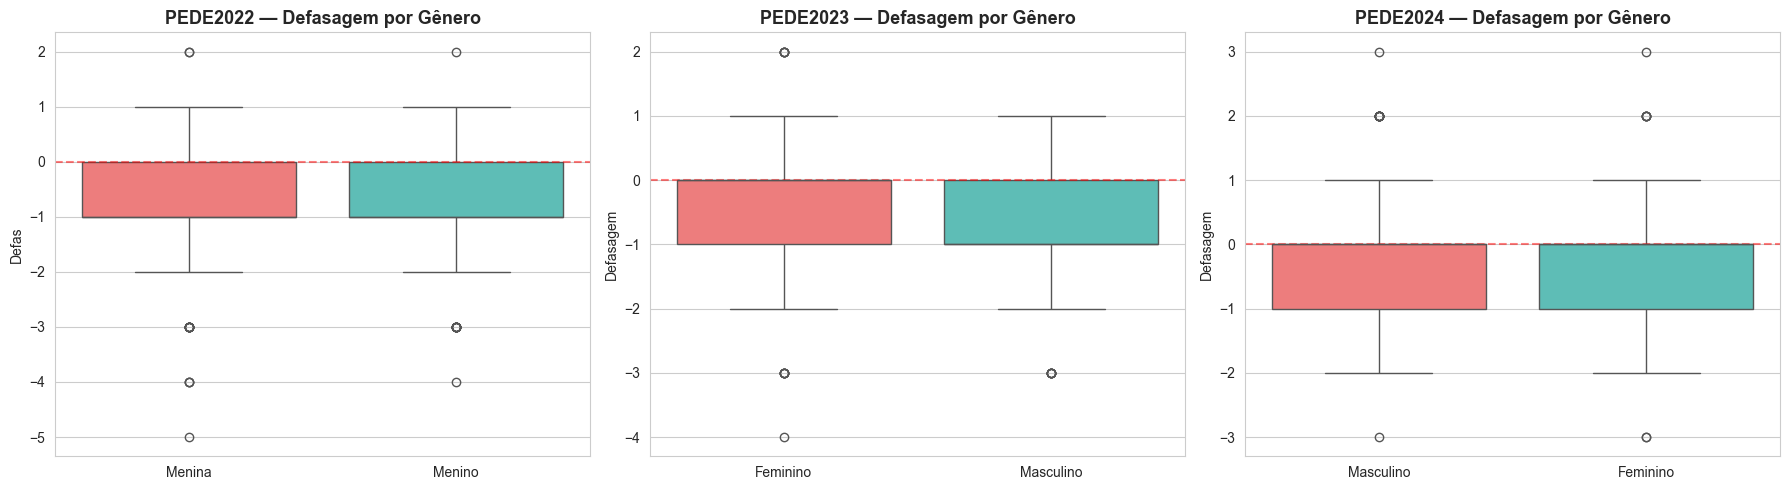

In [22]:
# Defasagem por Gênero — PEDE2022
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (ano, df) in enumerate(datasets.items()):
    ax = axes[idx]
    col = defas_cols[ano]
    
    if col in df.columns and 'Gênero' in df.columns:
        df_temp = df[['Gênero', col]].copy()
        df_temp[col] = pd.to_numeric(df_temp[col].astype(str).str.replace(',', '.'), errors='coerce')
        
        sns.boxplot(data=df_temp, x='Gênero', y=col, ax=ax, 
                   palette=['#FF6B6B', '#4ECDC4'])
        ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)
        ax.set_title(f'PEDE{ano} — Defasagem por Gênero', fontsize=13, fontweight='bold')
        ax.set_xlabel('')

plt.tight_layout()
plt.show()

## 11. Outliers — Detecção Exploratória

Análise visual de outliers nos principais indicadores usando boxplots combinados.

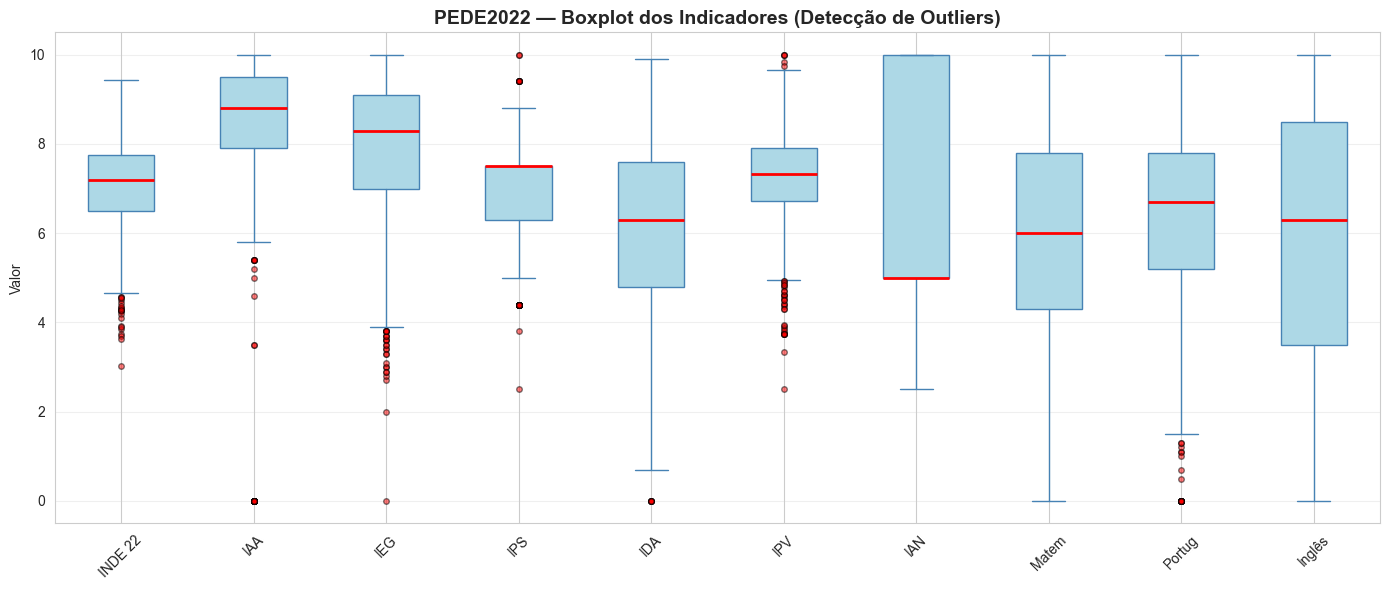


⚠️ Outliers detectados (IQR):
   INDE 22: 21 outliers (2.4%)
   IAA: 49 outliers (5.7%)
   IEG: 26 outliers (3.0%)
   IPS: 30 outliers (3.5%)
   IDA: 6 outliers (0.7%)
   IPV: 36 outliers (4.2%)
   Portug: 22 outliers (2.6%)


In [23]:
# Detecção visual de outliers — PEDE2022
indicadores_outlier = ['INDE 22', 'IAA', 'IEG', 'IPS', 'IDA', 'IPV', 'IAN', 'Matem', 'Portug', 'Inglês']

df_out = df_2022[indicadores_outlier].copy()
for col in df_out.columns:
    df_out[col] = pd.to_numeric(df_out[col].astype(str).str.replace(',', '.'), errors='coerce')

fig, ax = plt.subplots(figsize=(14, 6))
df_out.boxplot(ax=ax, vert=True, patch_artist=True,
               boxprops=dict(facecolor='lightblue', color='steelblue'),
               whiskerprops=dict(color='steelblue'),
               capprops=dict(color='steelblue'),
               medianprops=dict(color='red', linewidth=2),
               flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.5))

ax.set_title('PEDE2022 — Boxplot dos Indicadores (Detecção de Outliers)', fontsize=14, fontweight='bold')
ax.set_ylabel('Valor')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Contagem de outliers por IQR
print("\n⚠️ Outliers detectados (IQR):")
for col in df_out.columns:
    Q1 = df_out[col].quantile(0.25)
    Q3 = df_out[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_out[col] < Q1 - 1.5*IQR) | (df_out[col] > Q3 + 1.5*IQR)).sum()
    if outliers > 0:
        print(f"   {col}: {outliers} outliers ({outliers/len(df_out)*100:.1f}%)")

## 12. Resumo dos Insights e Conclusões

In [24]:
# Resumo quantitativo consolidado
print("=" * 70)
print("📊 RESUMO DA ANÁLISE EXPLORATÓRIA")
print("=" * 70)

for ano, df in datasets.items():
    col = defas_cols[ano]
    print(f"\n📅 PEDE{ano}:")
    print(f"   Total de alunos: {len(df):,}")
    
    if 'Gênero' in df.columns:
        genero = df['Gênero'].value_counts()
        print(f"   Gênero: {', '.join([f'{g}: {v}' for g, v in genero.items()])}")
    
    if col in df.columns:
        serie = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce').dropna()
        print(f"   Defasagem média: {serie.mean():.2f}")
        print(f"   Alunos com defasagem (< 0): {(serie < 0).sum()} ({(serie < 0).mean()*100:.1f}%)")
        print(f"   Alunos adequados (= 0): {(serie == 0).sum()} ({(serie == 0).mean()*100:.1f}%)")
        print(f"   Alunos adiantados (> 0): {(serie > 0).sum()} ({(serie > 0).mean()*100:.1f}%)")
    
    # Missing values
    missing_total = df.isnull().sum().sum()
    missing_pct = missing_total / (df.shape[0] * df.shape[1]) * 100
    print(f"   Missing values: {missing_total:,} ({missing_pct:.1f}% do total)")

print("\n" + "=" * 70)
print("🎯 PRINCIPAIS INSIGHTS PARA MODELAGEM:")
print("=" * 70)
print("""
1. CRESCIMENTO: O programa cresceu de 860 (2022) para 1.156 (2024) alunos.

2. INDICADORES-CHAVE: Os indicadores IAA, IDA, IEG, IPV e IAN são as
   variáveis com maior potencial preditivo para defasagem escolar.

3. PEDRAS: A classificação por Pedra tem forte correlação com os indicadores,
   servindo como proxy de desempenho geral.

4. NOTAS: As disciplinas (Mat, Port, Ing) complementam os indicadores
   comportamentais para uma visão holística do aluno.

5. PRÉ-PROCESSAMENTO NECESSÁRIO:
   - Converter vírgulas para pontos em colunas numéricas
   - Tratar valores missing (especialmente avaliadores e recomendações)
   - Padronizar nomes de colunas entre anos (Defas/Defasagem, Matem/Mat, etc.)
   - Encoding de variáveis categóricas (Pedra, Gênero, Instituição)

6. FEATURE ENGINEERING: Criar variáveis de evolução temporal usando dados
   de Pedra (20, 21, 22, 23) para capturar trajetória do aluno.
""")

📊 RESUMO DA ANÁLISE EXPLORATÓRIA

📅 PEDE2022:
   Total de alunos: 860
   Gênero: Menina: 457, Menino: 403
   Defasagem média: -0.94
   Alunos com defasagem (< 0): 601 (69.9%)
   Alunos adequados (= 0): 247 (28.7%)
   Alunos adiantados (> 0): 12 (1.4%)
   Missing values: 2,956 (8.0% do total)

📅 PEDE2023:
   Total de alunos: 1,014
   Gênero: Feminino: 546, Masculino: 468
   Defasagem média: -0.65
   Alunos com defasagem (< 0): 552 (54.4%)
   Alunos adequados (= 0): 420 (41.4%)
   Alunos adiantados (> 0): 42 (4.1%)
   Missing values: 21,157 (42.6% do total)

📅 PEDE2024:
   Total de alunos: 1,156
   Gênero: Feminino: 623, Masculino: 533
   Defasagem média: -0.41
   Alunos com defasagem (< 0): 534 (46.2%)
   Alunos adequados (= 0): 485 (42.0%)
   Alunos adiantados (> 0): 137 (11.9%)
   Missing values: 21,929 (37.2% do total)

🎯 PRINCIPAIS INSIGHTS PARA MODELAGEM:

1. CRESCIMENTO: O programa cresceu de 860 (2022) para 1.156 (2024) alunos.

2. INDICADORES-CHAVE: Os indicadores IAA, IDA, IEG,

---

## Próximos Passos

1. **Notebook 02 — Qualidade de Dados**: Análise profunda de missing values, inconsistências e limpeza
2. **Feature Engineering**: Criação de variáveis derivadas (evolução de Pedra, médias compostas, etc.)
3. **Treinamento do Modelo**: Pipeline de ML para predição de defasagem escolar
4. **Avaliação**: Métricas de desempenho e análise de confiança do modelo